# Backtest: EMA vs Price Strategy on BTCUSDT (QF-Lib + Python)

In [1]:
import sys
from pathlib import Path

import matplotlib
if not hasattr(matplotlib.rcParams, '_get'):
    matplotlib.rcParams._get = matplotlib.rcParams.get

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

project_root = Path('..').resolve()
if str(project_root / 'src') not in sys.path:
    sys.path.append(str(project_root / 'src'))

from data_loader import load_ohlcv_csv
from indicators import calculate_ema
from strategy import ema_vs_price_signals
from backtest import run_backtest, performance_metrics


In [2]:
df = load_ohlcv_csv('../data/OKX_BTCUSDT, 1D.csv')
df.head()

,open,high,low,close,EMA
time,,,,,
2025-01-17 00:00:00+00:00,99990.9,105847.4,99950.1,104084.4,87477.819959
2025-01-18 00:00:00+00:00,104084.5,104984.0,102288.0,104551.6,87780.010756
2025-01-19 00:00:00+00:00,104551.6,106448.6,99639.4,101334.0,88019.904371
2025-01-20 00:00:00+00:00,101334.0,109800.0,99526.4,102264.3,88272.017568
2025-01-21 00:00:00+00:00,102263.9,107285.8,100111.0,106150.1,88588.443806


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300 entries, 2025-01-17 00:00:00+00:00 to 2025-11-12 00:00:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    300 non-null    float64
 1   high    300 non-null    float64
 2   low     300 non-null    float64
 3   close   300 non-null    float64
 4   EMA     300 non-null    float64
dtypes: float64(5)
memory usage: 14.1 KB


In [4]:
df['EMA'] = calculate_ema(df['close'], span=50)
df[['close', 'EMA']].tail()

,close,EMA
time,,
2025-11-08 00:00:00+00:00,102320.1,110647.271021
2025-11-09 00:00:00+00:00,104722.4,110414.923137
2025-11-10 00:00:00+00:00,106012.0,110242.259485
2025-11-11 00:00:00+00:00,103061.7,109960.668917
2025-11-12 00:00:00+00:00,103274.7,109698.474057


In [5]:
positions = ema_vs_price_signals(df, ema_col='EMA')
positions.value_counts()

position
0    151
1    149
Name: count, dtype: int64

In [6]:
bt = run_backtest(df, positions, initial_capital=10000)
bt[['asset_ret', 'strategy_ret', 'equity_curve']].head()

,asset_ret,strategy_ret,equity_curve
time,,,
2025-01-17 00:00:00+00:00,0.000000,0.000000,10000.000000
2025-01-18 00:00:00+00:00,0.004489,0.000000,10000.000000
2025-01-19 00:00:00+00:00,-0.030775,-0.030775,9692.247656
2025-01-20 00:00:00+00:00,0.009181,0.000000,9692.247656
2025-01-21 00:00:00+00:00,0.037998,0.000000,9692.247656


In [7]:
metrics = performance_metrics(bt['equity_curve'])
for key, value in metrics.items():
    if isinstance(value, float):
        print(f'{key}: {value:.4f}')
    else:
        print(f'{key}: {value}')

total_return: 0.0414
annualized_return: 0.0348
annualized_volatility: 0.1977
sharpe_ratio: 0.1761
max_drawdown: -0.1463
max_drawdown_duration: 103


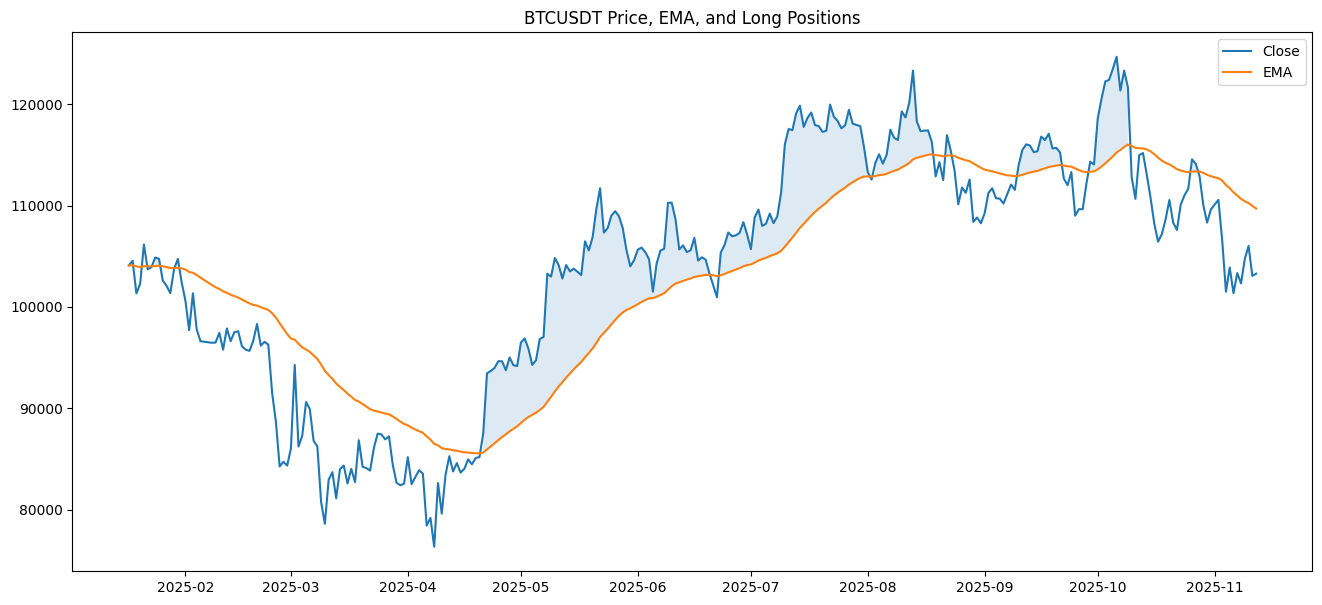

In [8]:
plt.figure(figsize=(16, 7))
plt.plot(df.index, df['close'], label='Close')
plt.plot(df.index, df['EMA'], label='EMA')
plt.fill_between(df.index, df['close'], df['EMA'], where=(positions == 1), alpha=0.15)
plt.title('BTCUSDT Price, EMA, and Long Positions')
plt.legend()
plt.show()

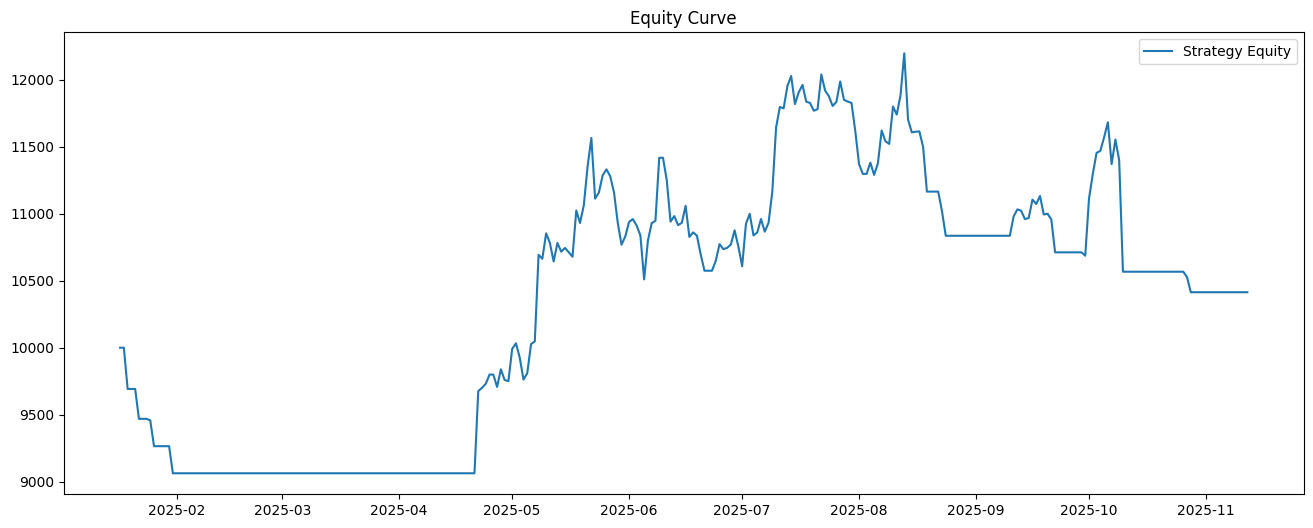

In [9]:
plt.figure(figsize=(16, 6))
plt.plot(bt.index, bt['equity_curve'], label='Strategy Equity')
plt.title('Equity Curve')
plt.legend()
plt.show()

## Kesimpulan
Notebook ini menunjukkan bagaimana memuat data BTCUSDT, menghitung EMA, menghasilkan sinyal long/cash sederhana, dan mengevaluasi performa strategi menggunakan metrik utama serta visualisasi. Eksperimen lanjutan dapat mencakup variasi periode EMA, penambahan biaya transaksi, atau integrasi indikator lain.